In [1]:
import scanpy
import anndata
import matplotlib
from matplotlib import pyplot
import hdf5plugin
import numpy
import scvelo
import seaborn
import pandas

In [2]:
# Read my adata

adata_star = scanpy.read_h5ad("/scratch/lema/m26_losu/splice_counts.h5ad")
print(adata_star)

AnnData object with n_obs × n_vars = 12875 × 78334
    obs: 'barcode', 'sample', 'group', 'day'
    var: 'ensemble_ids', 'gene_symbol'
    layers: 'ambiguous', 'any', 'spliced', 'unspliced'


In [3]:
# Read my velocity data

adata_velocity_star = scanpy.read_h5ad("/scratch/lema/m26_losu/velocity_adata_old_umap.h5ad")
print(adata_velocity_star)

AnnData object with n_obs × n_vars = 12792 × 2000
    obs: 'barcode', 'sample', 'group', 'day', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'manual_root', 'manual_end', 'velocity_pseudotime', 'latent_time'
    var: 'ensemble_ids', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2'
    uns: 'group_colors', 'log1p', 'neighbors', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_umap', 'veloci

In [4]:
# Read full adata

adata = scanpy.read_h5ad("/home/avesta/m26_losu/Hic2/adataL.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 13315 × 20948
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Day', 'MEF.identity', 'Pluripotency', 'Proliferation', 'ER.stress', 'Epithelial.identity', 'ECM.rearrangement', 'Apoptosis', 'Senescence', 'Neural.identity', 'Trophoblast.identity', 'X.reactivation', 'XEN', 'Trophoblast.progenitors', 'Spiral.Artery.Trophpblast.Giant.Cells', 'Spongiotrophoblasts', 'Oligodendrocyte.precursor.cells..OPC.', 'Astrocytes', 'Cortical.Neurons', 'RadialGlia.Id3', 'RadialGlia.Gdf10', 'RadialGlia.Neurog2', 'Long.term.MEFs', 'Embryonic.mesenchyme', 'Cxcl12.co.expressed', 'Ifitm1.co.expressed', 'Matn4.co.expressed', '2c', 'keratinization', 'skin.development', 'muscle.structure.development', 'cartilage.development', 'blood.vessel.development', 'skeletal.system.development', 'nervous.system.development', 'neuron.development', 'stem.cell.population.maintenance', 'Samples', 'sample_batch', 'initial_size_spliced', 'initial_size_unspli

In [5]:
# Read velocity adata
adata_velocity = scanpy.read_h5ad("/home/avesta/m26_losu/Hic2/adataL_dynamic_velocity.h5ad")
print(adata_velocity)

AnnData object with n_obs × n_vars = 13315 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'seurat_clusters', 'Day', 'MEF.identity', 'Pluripotency', 'Proliferation', 'ER.stress', 'Epithelial.identity', 'ECM.rearrangement', 'Apoptosis', 'Senescence', 'Neural.identity', 'Trophoblast.identity', 'X.reactivation', 'XEN', 'Trophoblast.progenitors', 'Spiral.Artery.Trophpblast.Giant.Cells', 'Spongiotrophoblasts', 'Oligodendrocyte.precursor.cells..OPC.', 'Astrocytes', 'Cortical.Neurons', 'RadialGlia.Id3', 'RadialGlia.Gdf10', 'RadialGlia.Neurog2', 'Long.term.MEFs', 'Embryonic.mesenchyme', 'Cxcl12.co.expressed', 'Ifitm1.co.expressed', 'Matn4.co.expressed', '2c', 'keratinization', 'skin.development', 'muscle.structure.development', 'cartilage.development', 'blood.vessel.development', 'skeletal.system.development', 'nervous.system.development', 'neuron.development', 'stem.cell.population.maintenance', 'Samples', 'sample_batch', 'initial_size_spliced', 'initial_size_unsplic

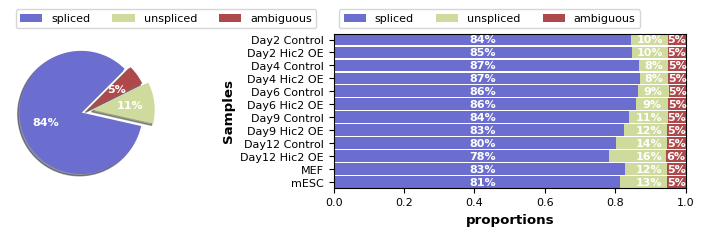

In [6]:
scvelo.pl.proportions(adata, groupby="Samples")

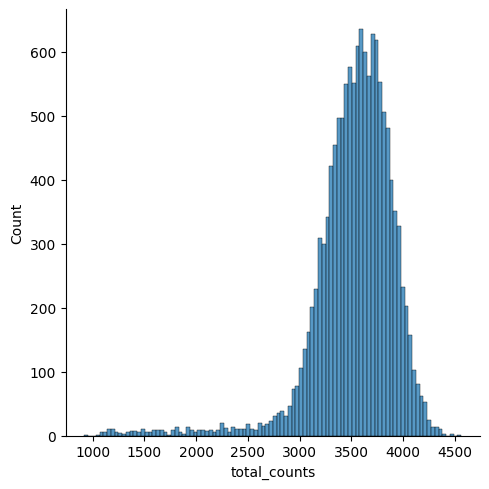

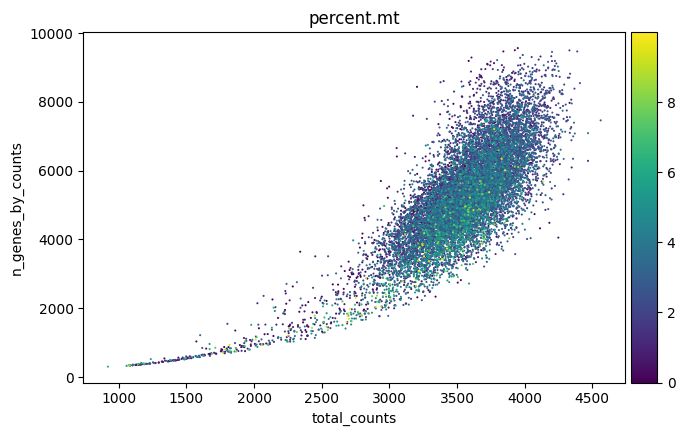

In [7]:
# Quality control

scanpy.pp.calculate_qc_metrics(
    adata, inplace=True, percent_top=[], log1p=False
)
histogram = seaborn.displot(adata.obs["total_counts"], bins=100, kde=False)
scatter = scanpy.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="percent.mt")

In [16]:
# My data
cells = len(adata_star)
print(f"Total counts: {adata_star.layers["any"].sum()/cells:.1f}")
print(f"Spliced: {adata_star.layers["spliced"].sum()/cells:.1f}")
print(f"Unspliced: {adata_star.layers["unspliced"].sum()/cells:.1f}")
print(f"Ambiguous: {adata_star.layers["ambiguous"].sum()/cells:.1f}")
print(f"Nonzero total: {(adata_star.X!=0).sum()}")

gene = "Nanog"
print(f"Gene: {gene}")
print(f"Total count: {adata_star[:, gene].layers["any"].sum()}")
print(f"Spliced: {adata_star[:, gene].layers["spliced"].sum()}")
print(f"Unspliced: {adata_star[:, gene].layers["unspliced"].sum()}")
print(f"Ambiguous: {adata_star[:, gene].layers["ambiguous"].sum()}")
print(f"Nonzero total: {(adata_star[:, gene].X!=0).sum()}")

Total counts: 32925.6
Spliced: 28391.4
Unspliced: 3406.4
Ambiguous: 1827.9
Nonzero total: 63498514
Gene: Nanog
Total count: 9254.0
Spliced: 8955.0
Unspliced: 1072.0
Ambiguous: 163.0
Nonzero total: 3318


In [18]:
# Emil's data
cells = len(adata)
print(f"Total counts: {adata.layers["matrix"].sum()/cells:.1f}")
print(f"Spliced: {adata.layers["spliced"].sum()/cells:.1f}")
print(f"Unspliced: {adata.layers["unspliced"].sum()/cells:.1f}")
print(f"Ambiguous: {adata.layers["ambiguous"].sum()/cells:.1f}")
print(f"Nonzero total: {(adata.X!=0).sum()}")

gene = "Nanog"
print(f"Gene: {gene}")
print(f"Total count: {adata[:, gene].layers["matrix"].sum()}")
print(f"Spliced: {adata[:, gene].layers["spliced"].sum()}")
print(f"Unspliced: {adata[:, gene].layers["unspliced"].sum()}")
print(f"Ambiguous: {adata[:, gene].layers["ambiguous"].sum()}")
print(f"Nonzero total: {(adata[:, gene].X!=0).sum()}")

Total counts: 31202.3
Spliced: 22733.1
Unspliced: 2595.9
Ambiguous: 1609.6
Nonzero total: 69582562
Gene: Nanog
Total count: 9924.0
Spliced: 8825.234375
Unspliced: 758.0491333007812
Ambiguous: 160
Nonzero total: 3347


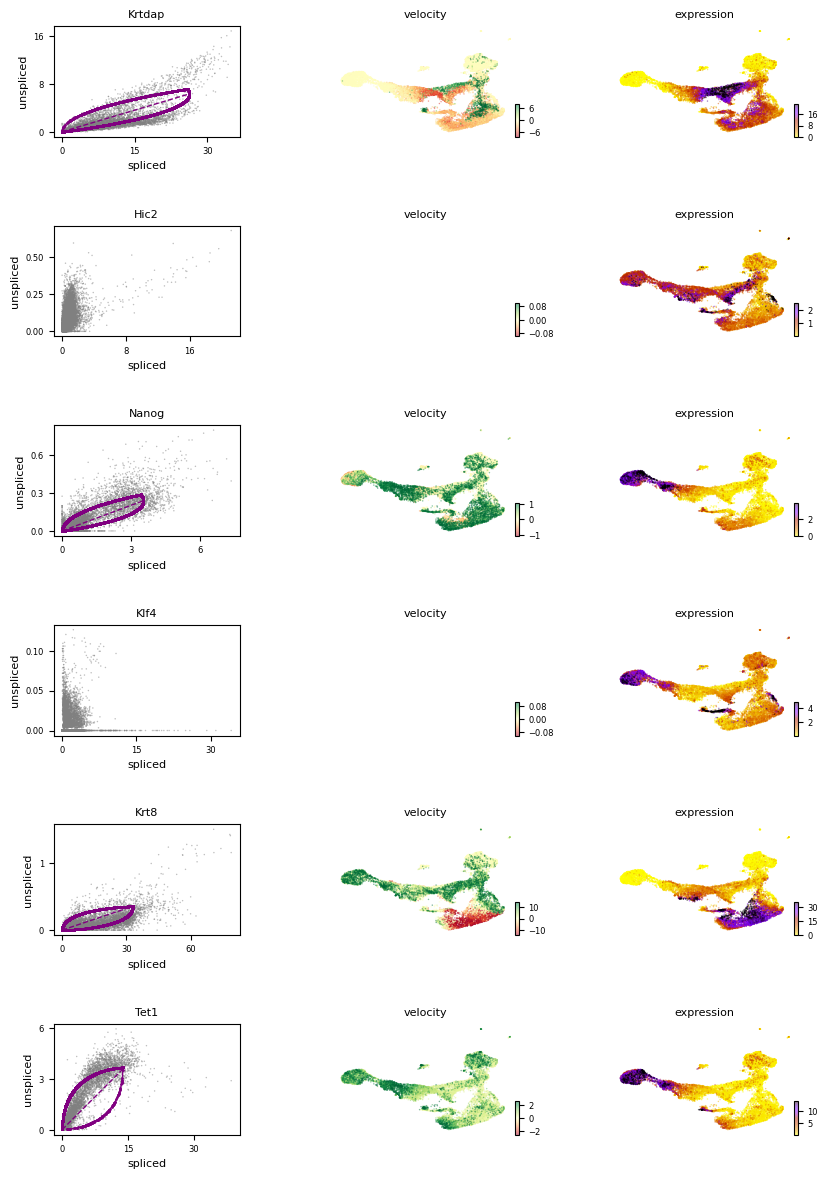

In [19]:
model_genes = ["Krtdap", "Hic2", "Nanog", "Klf4", "Krt8", "Tet1"]
scvelo.pl.velocity(adata_velocity, var_names=model_genes)

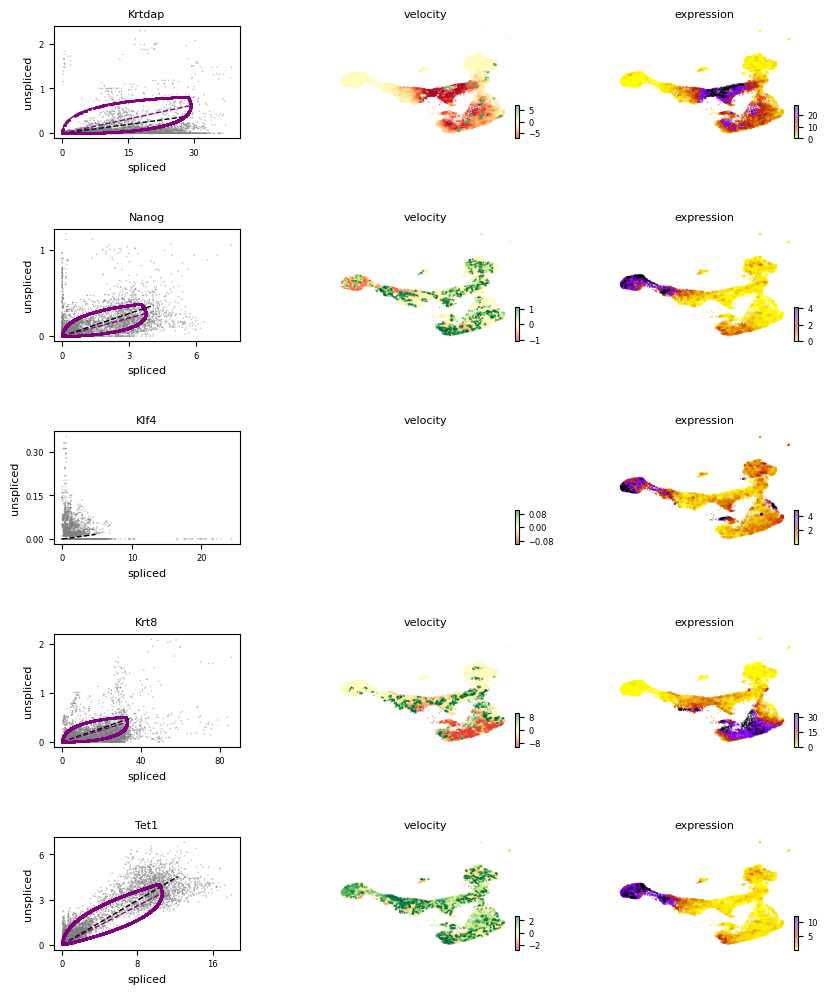

In [12]:
scvelo.pl.velocity(adata_velocity_star, var_names=model_genes)